# Flight Price Prediction

In [1]:
#importing necessary libararies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew 
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

In [2]:
#importing Datset
df=pd.read_excel(r"C:\Users\moham\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Data_Train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
# checking for null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
#dropping the null values
df=df.dropna()

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
df["Date_of_Journey"].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [10]:
#Seperating Date Month Year
df['Date'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [11]:
df=df.drop(["Date_of_Journey"],axis=1)

In [12]:
df['Date'] = df['Date'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10682 non-null  object
 9   Price            10682 non-null  int64 
 10  Date             10682 non-null  int32 
 11  Month            10682 non-null  int32 
 12  Year             10682 non-null  int32 
dtypes: int32(3), int64(1), object(9)
memory usage: 1.0+ MB


In [14]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Date', 'Month',
       'Year'],
      dtype='object')

In [15]:
df.drop(columns=["Route","Dep_Time","Arrival_Time","Additional_Info","Year"],inplace=True)

In [16]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,Date,Month
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3
...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,4107,9,4
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,4145,27,4
10680,Jet Airways,Banglore,Delhi,3h,non-stop,7229,27,4
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,12648,1,3


In [17]:
#converting duration taken for flight in seconds
df['Duration'] = (pd.to_timedelta(df['Duration']).dt.seconds // 60).astype(str)
df

,Airline,Source,Destination,Duration,Total_Stops,Price,Date,Month
0,IndiGo,Banglore,New Delhi,170,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,445,2 stops,7662,1,5
2,Jet Airways,Delhi,Cochin,1140,2 stops,13882,9,6
3,IndiGo,Kolkata,Banglore,325,1 stop,6218,12,5
4,IndiGo,Banglore,New Delhi,285,1 stop,13302,1,3
...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,non-stop,4107,9,4
10679,Air India,Kolkata,Banglore,155,non-stop,4145,27,4
10680,Jet Airways,Banglore,Delhi,180,non-stop,7229,27,4
10681,Vistara,Banglore,New Delhi,160,non-stop,12648,1,3


In [18]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,Date,Month
0,IndiGo,Banglore,New Delhi,170,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,445,2 stops,7662,1,5
2,Jet Airways,Delhi,Cochin,1140,2 stops,13882,9,6
3,IndiGo,Kolkata,Banglore,325,1 stop,6218,12,5
4,IndiGo,Banglore,New Delhi,285,1 stop,13302,1,3
...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,non-stop,4107,9,4
10679,Air India,Kolkata,Banglore,155,non-stop,4145,27,4
10680,Jet Airways,Banglore,Delhi,180,non-stop,7229,27,4
10681,Vistara,Banglore,New Delhi,160,non-stop,12648,1,3


In [19]:
df.rename(columns = {'Duration': 'Duration_In_Minutes'},inplace=True)
df

,Airline,Source,Destination,Duration_In_Minutes,Total_Stops,Price,Date,Month
0,IndiGo,Banglore,New Delhi,170,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,445,2 stops,7662,1,5
2,Jet Airways,Delhi,Cochin,1140,2 stops,13882,9,6
3,IndiGo,Kolkata,Banglore,325,1 stop,6218,12,5
4,IndiGo,Banglore,New Delhi,285,1 stop,13302,1,3
...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,non-stop,4107,9,4
10679,Air India,Kolkata,Banglore,155,non-stop,4145,27,4
10680,Jet Airways,Banglore,Delhi,180,non-stop,7229,27,4
10681,Vistara,Banglore,New Delhi,160,non-stop,12648,1,3


In [20]:
df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [21]:
df["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [22]:
df["Destination"]=df["Destination"].map({"New Delhi":0 ,"Banglore":1,"Cochin":2,"Kolkata":3,"Delhi":4,"Hyderabad":5})

In [23]:
df["Source"]=df["Source"].map({"Banglore":1 ,"Kolkata":3,"Delhi":4,"Chennai":6,"Mumbai":7,})

In [24]:
df

,Airline,Source,Destination,Duration_In_Minutes,Total_Stops,Price,Date,Month
0,IndiGo,1,0,170,non-stop,3897,24,3
1,Air India,3,1,445,2 stops,7662,1,5
2,Jet Airways,4,2,1140,2 stops,13882,9,6
3,IndiGo,3,1,325,1 stop,6218,12,5
4,IndiGo,1,0,285,1 stop,13302,1,3
...,...,...,...,...,...,...,...,...
10678,Air Asia,3,1,150,non-stop,4107,9,4
10679,Air India,3,1,155,non-stop,4145,27,4
10680,Jet Airways,1,4,180,non-stop,7229,27,4
10681,Vistara,1,0,160,non-stop,12648,1,3


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  int64 
 2   Destination          10682 non-null  int64 
 3   Duration_In_Minutes  10682 non-null  object
 4   Total_Stops          10682 non-null  object
 5   Price                10682 non-null  int64 
 6   Date                 10682 non-null  int32 
 7   Month                10682 non-null  int32 
dtypes: int32(2), int64(3), object(3)
memory usage: 667.6+ KB


In [26]:
df['Duration_In_Minutes']=df['Duration_In_Minutes'].astype(int)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  int64 
 2   Destination          10682 non-null  int64 
 3   Duration_In_Minutes  10682 non-null  int32 
 4   Total_Stops          10682 non-null  object
 5   Price                10682 non-null  int64 
 6   Date                 10682 non-null  int32 
 7   Month                10682 non-null  int32 
dtypes: int32(3), int64(3), object(2)
memory usage: 625.9+ KB


In [28]:
#applying label encoding to convert obj into int
le = LabelEncoder()
Label = ["Total_Stops","Airline"]

for i in Label:
    df[i] = le.fit_transform(df[i])

df

,Airline,Source,Destination,Duration_In_Minutes,Total_Stops,Price,Date,Month
0,3,1,0,170,4,3897,24,3
1,1,3,1,445,1,7662,1,5
2,4,4,2,1140,1,13882,9,6
3,3,3,1,325,0,6218,12,5
4,3,1,0,285,0,13302,1,3
...,...,...,...,...,...,...,...,...
10678,0,3,1,150,4,4107,9,4
10679,1,3,1,155,4,4145,27,4
10680,4,1,4,180,4,7229,27,4
10681,10,1,0,160,4,12648,1,3


In [29]:
df.describe()

,Airline,Source,Destination,Duration_In_Minutes,Total_Stops,Price,Date,Month
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,3.381296,2.024995,492.037540,1.458248,9087.214567,13.509081,4.708575
std,2.352090,1.570727,1.309166,382.983049,1.806320,4611.548810,8.479363,1.164408
min,0.000000,1.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000
25%,3.000000,3.000000,1.000000,165.000000,0.000000,5277.000000,6.000000,3.000000
50%,4.000000,4.000000,2.000000,380.000000,0.000000,8372.000000,12.000000,5.000000
75%,4.000000,4.000000,2.000000,755.000000,4.000000,12373.000000,21.000000,6.000000
max,11.000000,7.000000,5.000000,1435.000000,4.000000,79512.000000,27.000000,6.000000


## Pair Plot

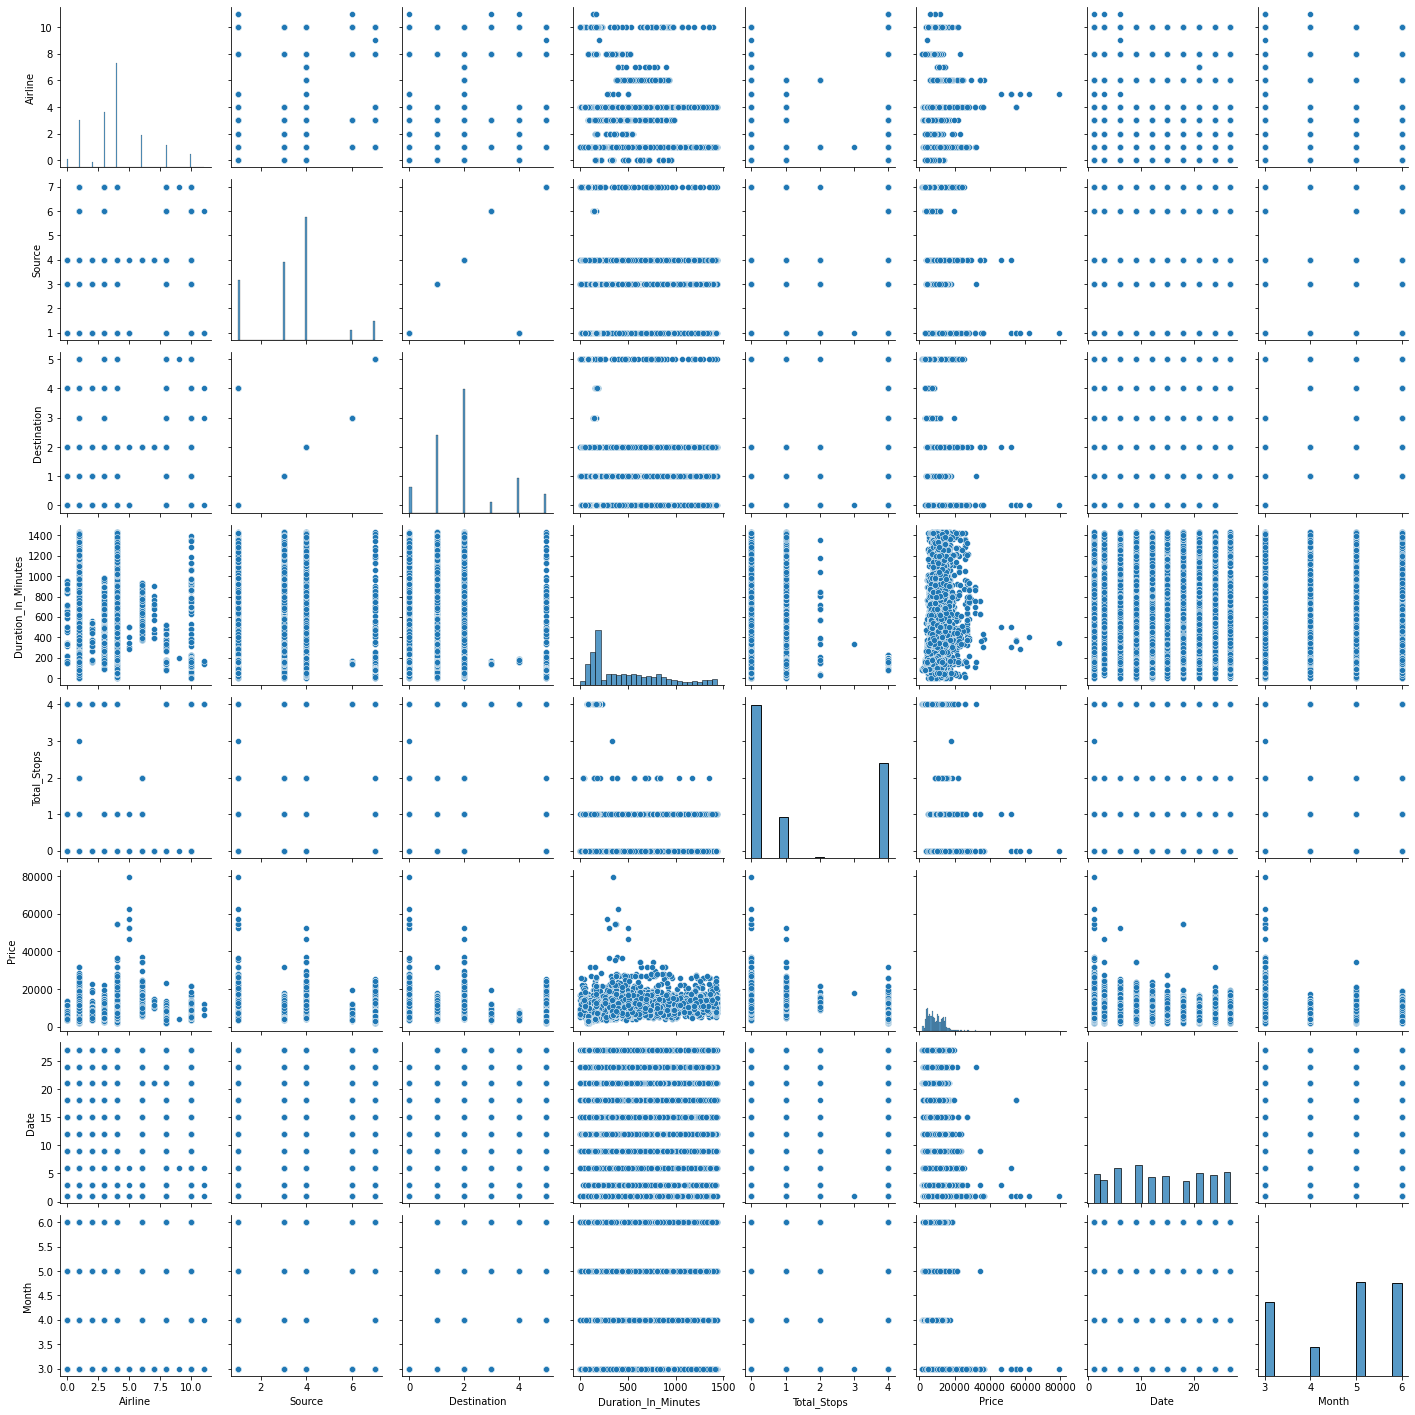

In [30]:
sns.pairplot(df)

## Box Plot

Airline                   AxesSubplot(0.125,0.749828;0.133621x0.130172)
Source                 AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Destination             AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Duration_In_Minutes    AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Total_Stops            AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Date                      AxesSubplot(0.125,0.593621;0.133621x0.130172)
Month                  AxesSubplot(0.285345,0.593621;0.133621x0.130172)
dtype: object

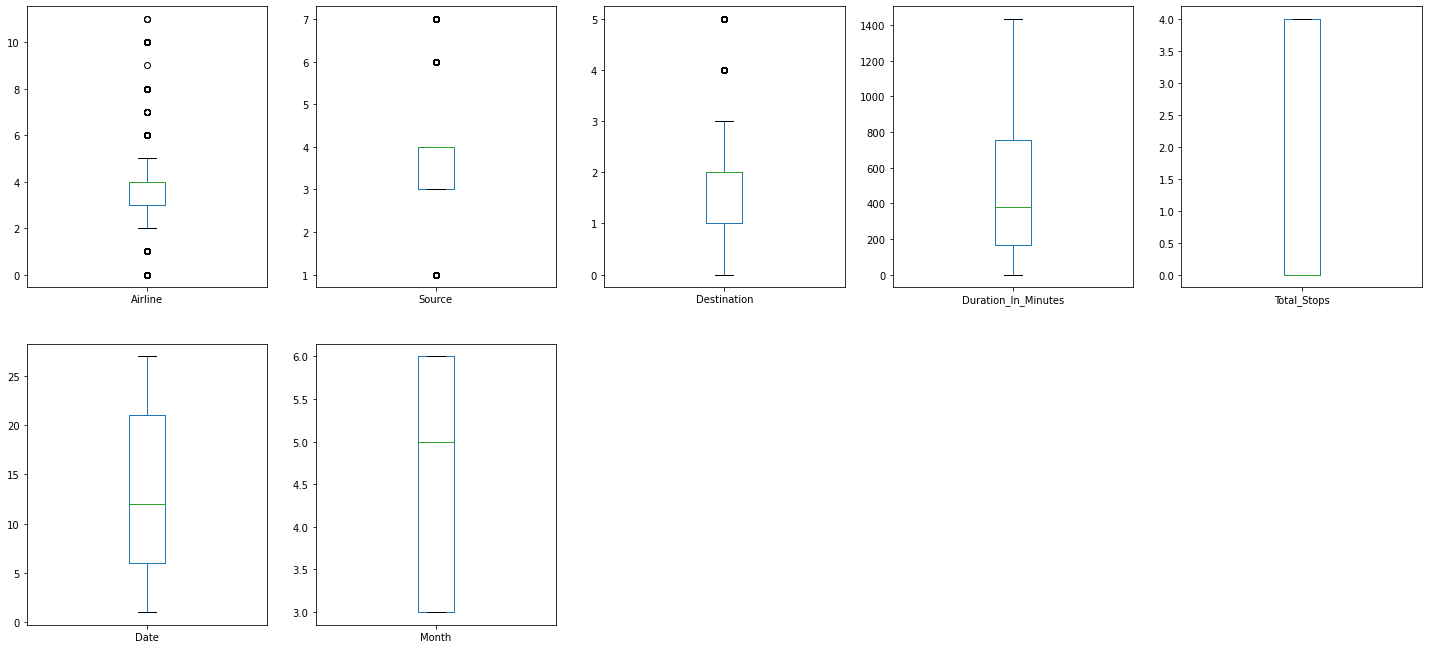

In [31]:
df.drop(["Price"],axis=1).plot(kind='box',subplots=True,layout=(5,5),figsize=(25,30))

## Scatter pLot

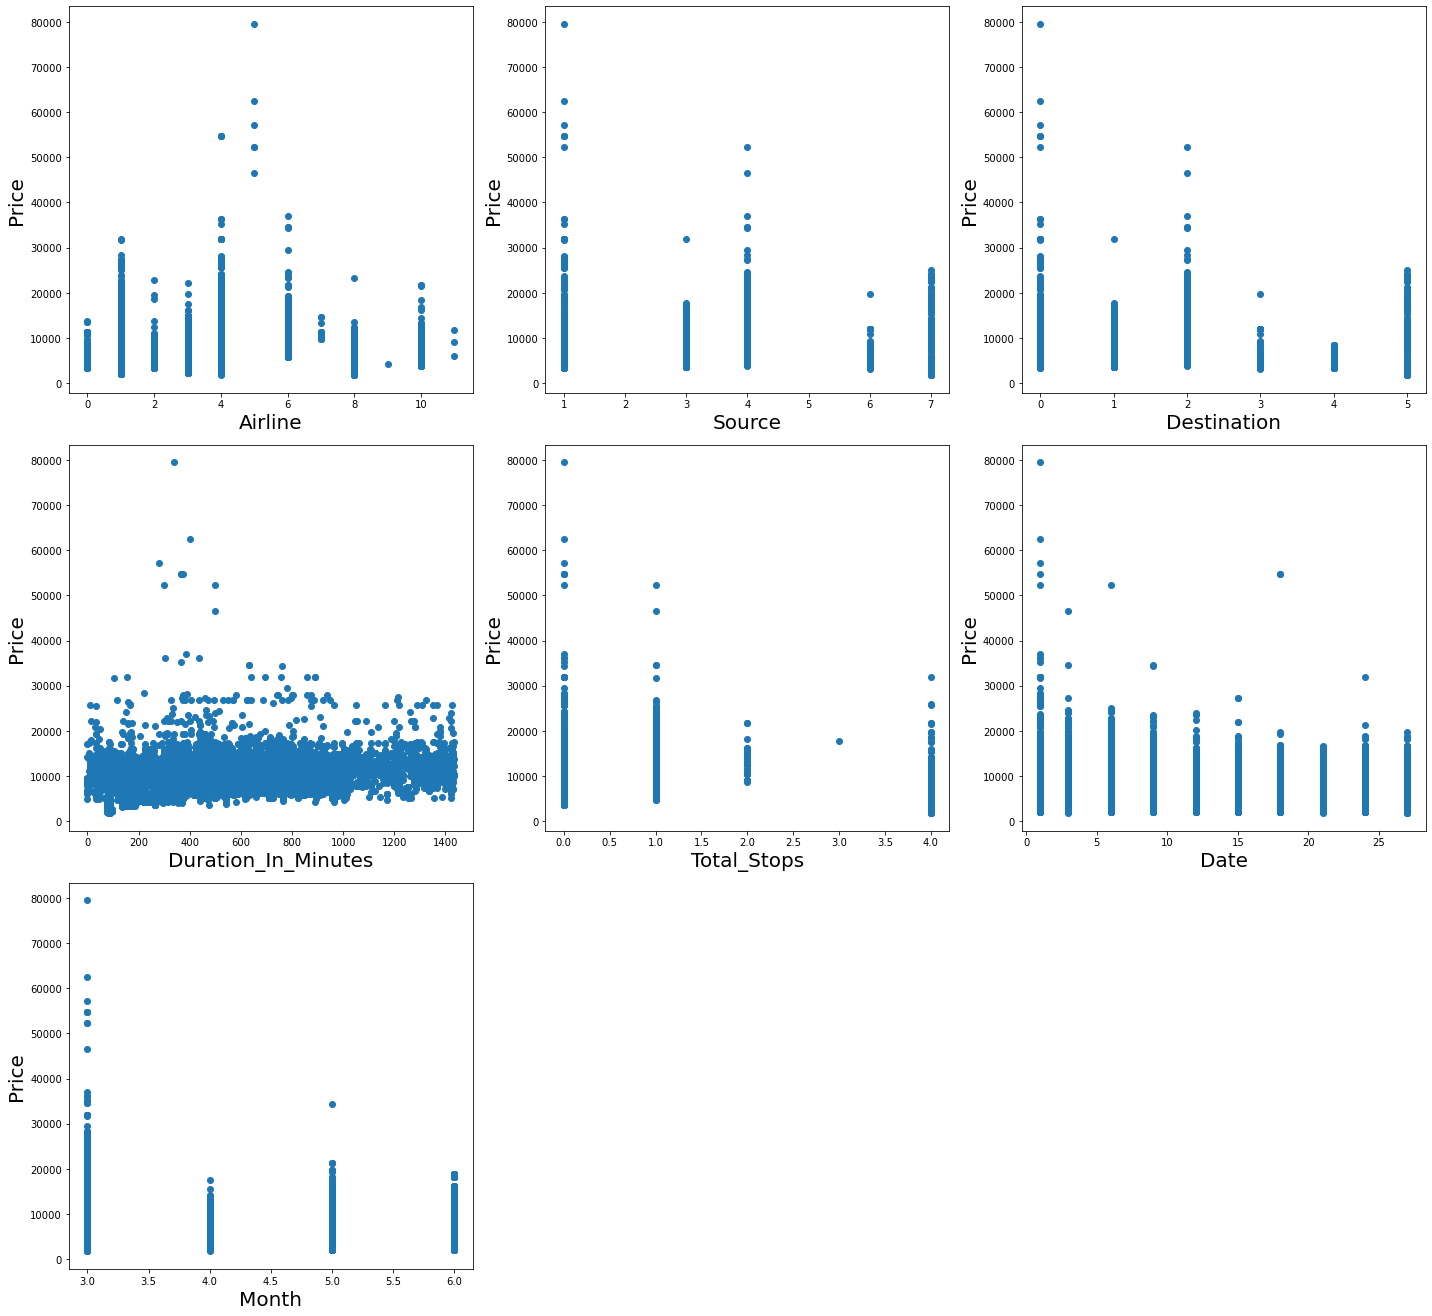

In [32]:
X=df.drop(columns="Price")
Y=df["Price"]

plt.figure(figsize=(20,30))
pltnumber=1

for column in X:
    if pltnumber<=15:
        ax=plt.subplot(5,3,pltnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    pltnumber+=1
plt.tight_layout()

## Dist Plot

0.7309546704958708
0.26864455623466166
0.7352469772613638
0.8300261471783166
0.6314428223951454
1.8121500412235738
0.11815771834849484
-0.3873550884815872


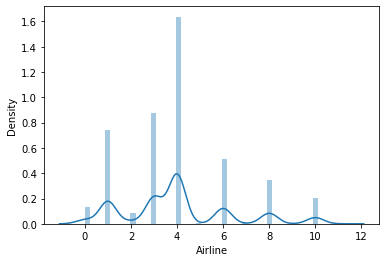

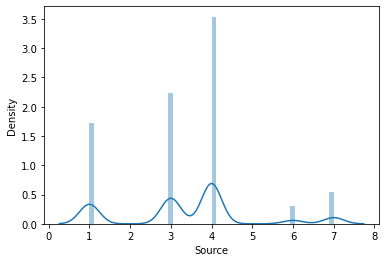

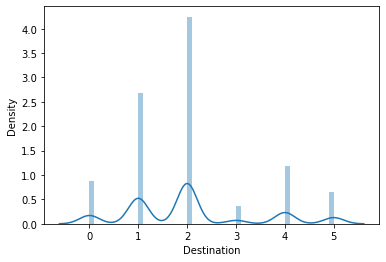

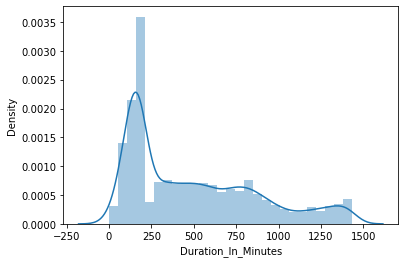

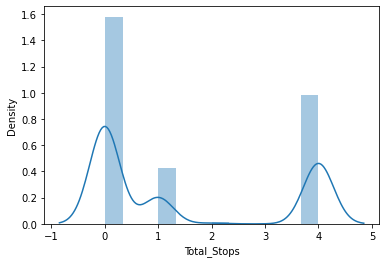

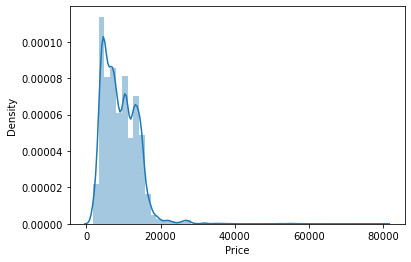

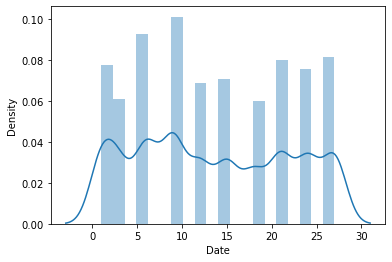

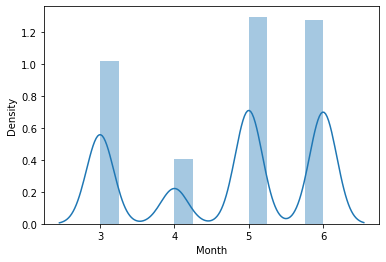

In [33]:
for col in df:
    print(skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show

In [ ]:
# To find corelation using Heatmap and VIF technique

In [34]:
df_corr=df.corr().abs()
df_corr

,Airline,Source,Destination,Duration_In_Minutes,Total_Stops,Price,Date,Month
Airline,1.000000,0.046974,0.064793,0.089847,0.035973,0.039565,0.026137,0.024674
Source,0.046974,1.000000,0.367568,0.015060,0.062052,0.062684,0.050974,0.146862
Destination,0.064793,0.367568,1.000000,0.333355,0.518987,0.395690,0.047248,0.189275
Duration_In_Minutes,0.089847,0.015060,0.333355,1.000000,0.586732,0.449677,0.013887,0.044947
Total_Stops,0.035973,0.062052,0.518987,0.586732,1.000000,0.571221,0.029225,0.026328
Price,0.039565,0.062684,0.395690,0.449677,0.571221,1.000000,0.153774,0.103643
Date,0.026137,0.050974,0.047248,0.013887,0.029225,0.153774,1.000000,0.038359
Month,0.024674,0.146862,0.189275,0.044947,0.026328,0.103643,0.038359,1.000000


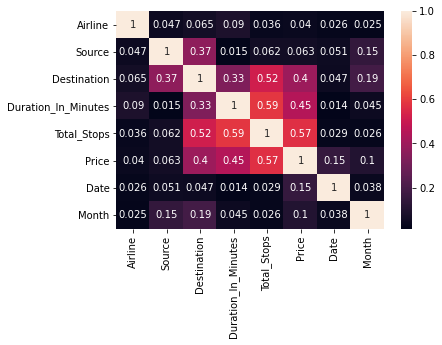

In [35]:
sns.heatmap(df_corr,annot=True)
plt.show()

In [36]:
X=df.drop(columns="Price")
Y=df["Price"]

scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,1.012715,Airline
1,1.291583,Source
2,1.827782,Destination
3,1.542157,Duration_In_Minutes
4,2.034970,Total_Stops
5,1.006977,Date
6,1.067655,Month


In [37]:
X=df.drop(columns="Price")
Y=df["Price"]

In [38]:
# using OLS method to find out the summary
lm=smf.ols(formula='Y~X',data=df).fit()

In [39]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     972.1
Date:                Tue, 29 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:47:34   Log-Likelihood:            -1.0264e+05
No. Observations:               10682   AIC:                         2.053e+05
Df Residuals:                   10674   BIC:                         2.054e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.359e+04    192.930     70.447      0.000    1.32e+04     1.4e+04
X[0]           9.1905     14.924      0.616      0.538     -20.063      38.444
X[1]        -129.9125     25.238     -5.148      0.000    -179.384     -80.441
X[2]        -241.8685     36.021     -6.715      0.000    -312.477    -171.260
X[3]           2.1223      0.113     18.764      0.000       1.901       2.344
X[4]       -1107.8365     27.547    -40.216      0.000   -1161.834   -1053.839
X[5]         -74.7495      4.128    -18.108      0.000     -82.841     -66.658
X[6]        -431.2240     30.953    -13.932      0.000    -491.898    -370.550
==============================================================================
Omnibus:                     7257.284   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           359101.614
Skew:                           2.668   Prob(JB):                         0.00
Kurtosis:                      30.899   Cond. No.                     3.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Using Linear Regression

In [40]:
from sklearn.metrics import r2_score

In [41]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [43]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [44]:
Y_pred=lm.predict(X_test)
Y_pred_train=lm.predict(X_train)

In [45]:
lm.score(X_train,Y_train)


0.3885153062039066

In [46]:
lm.score(X_test,Y_test)

0.39024387668683913

In [47]:
r2=r2_score(Y_test,Y_pred)
r2

0.39024387668683913

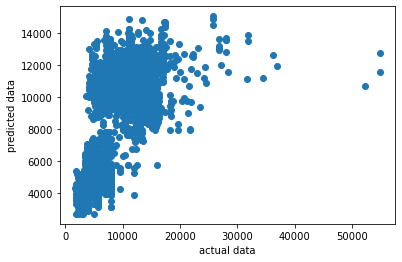

In [48]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

# LINEAR REGRESSION USING RIDGE REGRESSION

In [49]:
ridge=Ridge()

In [50]:
parameters={
    'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]
}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='r2',cv=5)


In [51]:
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='r2')

In [52]:
print(ridge_regressor.best_params_)

{'alpha': 50}


In [53]:
print(ridge_regressor.best_score_)

0.3894249922107063


In [54]:
ridge_regressor.score(X_test,Y_test)

0.3900628701334794

In [55]:
r2=r2_score(Y_test,Y_pred)
r2

0.39024387668683913

# MODEL USING KNN

In [56]:
from sklearn.neighbors import KNeighborsRegressor

In [57]:
X=df.drop(columns="Price")
Y=df["Price"]

In [58]:
scaler=StandardScaler()

In [59]:
X_scaled=scaler.fit_transform(X)

In [60]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [61]:
knn=KNeighborsRegressor()

In [62]:
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [63]:
Y_pred=knn.predict(X_test)

In [64]:
knn.score(X_train,Y_train)

0.8289215678169396

In [65]:
knn.score(X_test,Y_test)

0.7270871457112008

In [66]:
r2=r2_score(Y_test,Y_pred)
r2

0.7270871457112008

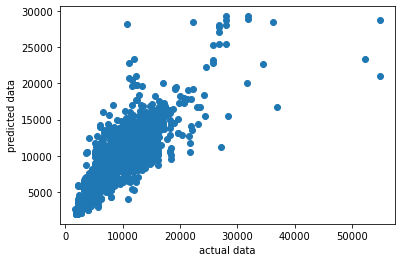

In [67]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

# KNN MODEL USING HYPERPARAMETER TUNING

In [68]:
X=df.drop(columns="Price")
Y=df["Price"]

In [69]:
scaler=StandardScaler()

In [70]:
X_scaled=scaler.fit_transform(X)

In [71]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [72]:
knn=KNeighborsRegressor()

In [73]:
param_grid=[
    {'algorithm':['kd_tree','brute','ball_tree'],
    'leaf_size':[15,18,20],
    'n_neighbors':[3,5,7,13]
    }
]

In [74]:
clf=GridSearchCV(knn,param_grid,cv=3,n_jobs=-1)

In [75]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'algorithm': ['kd_tree', 'brute', 'ball_tree'],
                          'leaf_size': [15, 18, 20],
                          'n_neighbors': [3, 5, 7, 13]}])

In [76]:
clf.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 15, 'n_neighbors': 5}

In [77]:
Y_pred=clf.predict(X_test)
Y_pred_train=clf.predict(X_train)

In [78]:
clf.score(X_train,Y_train)

0.8289481374501623

In [79]:
clf.score(X_test,Y_test)

0.7279848483654691

In [80]:
r2=r2_score(Y_test,Y_pred)
r2

0.7279848483654691

# DECISION TREE MODEL

In [81]:
X=df.drop(columns="Price")
Y=df["Price"]

In [82]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [83]:
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [84]:
Y_pred=dt.predict(X_test)

In [85]:
dt.score(X_train,Y_train)

0.9486638366817295

In [86]:
dt.score(X_test,Y_test)

0.7024039970966123

In [87]:
r2=r2_score(Y_test,Y_pred)
r2

0.7024039970966123

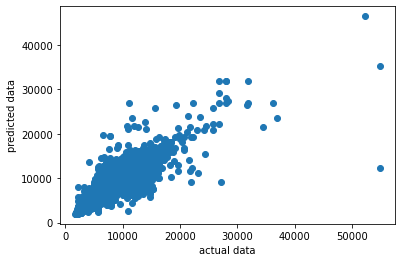

In [88]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

# DECISION TREE WITH HYPER PARAMETER TUNING

In [89]:
X=df.drop(columns="Price")
Y=df["Price"]

In [90]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [91]:
dt=DecisionTreeRegressor()


In [92]:
param_grid = {
               'max_depth': range(3,12,2),
               'min_samples_split': range(4,10,2),
               'min_samples_leaf': range(3,10,2),
              'criterion':["mse", "friedman_mse", "mae", "poisson"]}

In [93]:
clf=GridSearchCV(dt,param_grid,cv=5,n_jobs=-1,verbose=2)

In [94]:
clf.fit(X_train,Y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)},
             verbose=2)

In [95]:
clf.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 11,
 'min_samples_leaf': 3,
 'min_samples_split': 8}

In [96]:
Y_pred=clf.predict(X_test)


In [97]:
clf.score(X_train,Y_train)

0.8377137260228702

In [98]:
clf.score(X_test,Y_test)

0.7836226232258632

In [99]:
r2=r2_score(Y_test,Y_pred)
r2

0.7836226232258632

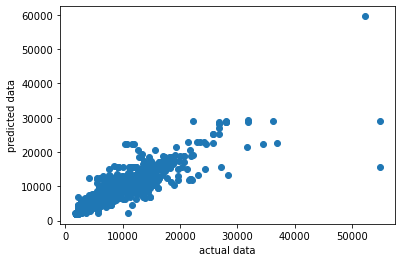

In [100]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

# Using Gradient Boosting 

In [101]:
from sklearn.ensemble import GradientBoostingRegressor

In [102]:
X=df.drop(columns="Price")
Y=df["Price"]

In [103]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [104]:
gbdt=GradientBoostingRegressor()

In [105]:
gbdt.fit(X_train,Y_train)

GradientBoostingRegressor()

In [106]:
Y_pred=gbdt.predict(X_test)

In [107]:
gbdt.score(X_train,Y_train)

0.77612855382258

In [108]:
gbdt.score(X_test,Y_test)

0.7459047465227675

In [109]:
r2=r2_score(Y_test,Y_pred)
r2

0.7459047465227675

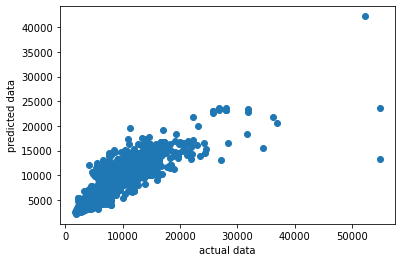

In [110]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

# Test Dataset


In [111]:
# importing test Dataset
df1=pd.read_excel(r"C:\Users\moham\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Test_set.xlsx")
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [112]:
#checking for null values in test dataset
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [113]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [114]:
df1.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [115]:
df1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [116]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [117]:
df1["Date_of_Journey"].unique()

array(['6/06/2019', '12/05/2019', '21/05/2019', '24/06/2019',
       '12/06/2019', '12/03/2019', '1/05/2019', '15/03/2019',
       '18/05/2019', '21/03/2019', '15/06/2019', '15/05/2019',
       '3/06/2019', '06/03/2019', '24/03/2019', '6/03/2019', '9/05/2019',
       '18/03/2019', '6/04/2019', '1/06/2019', '3/03/2019', '27/03/2019',
       '9/06/2019', '3/05/2019', '1/04/2019', '18/06/2019', '15/04/2019',
       '6/05/2019', '9/03/2019', '3/04/2019', '27/06/2019', '21/06/2019',
       '21/04/2019', '18/04/2019', '9/04/2019', '24/05/2019',
       '01/03/2019', '09/03/2019', '27/05/2019', '03/03/2019',
       '27/04/2019', '1/03/2019', '24/04/2019', '12/04/2019'],
      dtype=object)

In [118]:
df1['Date'] = df1['Date_of_Journey'].str.split('/').str[0]
df1['Month'] = df1['Date_of_Journey'].str.split('/').str[1]
df1['Year'] = df1['Date_of_Journey'].str.split('/').str[2]
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,06,2019
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,05,2019
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,05,2019
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,05,2019
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,06,2019


In [119]:
df1=df1.drop(["Date_of_Journey"],axis=1)

In [120]:
df1['Date'] = df1['Date'].astype(int)
df1['Month'] = df1['Month'].astype(int)
df1['Year'] = df1['Year'].astype(int)

In [121]:
df1.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Date', 'Month', 'Year'],
      dtype='object')

In [122]:
df1.drop(columns=["Route","Dep_Time","Arrival_Time","Additional_Info","Year"],inplace=True)

In [123]:
df1

,Airline,Source,Destination,Duration,Total_Stops,Date,Month
0,Jet Airways,Delhi,Cochin,10h 55m,1 stop,6,6
1,IndiGo,Kolkata,Banglore,4h,1 stop,12,5
2,Jet Airways,Delhi,Cochin,23h 45m,1 stop,21,5
3,Multiple carriers,Delhi,Cochin,13h,1 stop,21,5
4,Air Asia,Banglore,Delhi,2h 50m,non-stop,24,6
...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,23h 55m,1 stop,6,6
2667,IndiGo,Kolkata,Banglore,2h 35m,non-stop,27,3
2668,Jet Airways,Delhi,Cochin,6h 35m,1 stop,6,3
2669,Air India,Delhi,Cochin,15h 15m,1 stop,6,3


In [124]:
df1['Duration'] = (pd.to_timedelta(df1['Duration']).dt.seconds // 60).astype(str)
df1

,Airline,Source,Destination,Duration,Total_Stops,Date,Month
0,Jet Airways,Delhi,Cochin,655,1 stop,6,6
1,IndiGo,Kolkata,Banglore,240,1 stop,12,5
2,Jet Airways,Delhi,Cochin,1425,1 stop,21,5
3,Multiple carriers,Delhi,Cochin,780,1 stop,21,5
4,Air Asia,Banglore,Delhi,170,non-stop,24,6
...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1435,1 stop,6,6
2667,IndiGo,Kolkata,Banglore,155,non-stop,27,3
2668,Jet Airways,Delhi,Cochin,395,1 stop,6,3
2669,Air India,Delhi,Cochin,915,1 stop,6,3


In [125]:
df1

,Airline,Source,Destination,Duration,Total_Stops,Date,Month
0,Jet Airways,Delhi,Cochin,655,1 stop,6,6
1,IndiGo,Kolkata,Banglore,240,1 stop,12,5
2,Jet Airways,Delhi,Cochin,1425,1 stop,21,5
3,Multiple carriers,Delhi,Cochin,780,1 stop,21,5
4,Air Asia,Banglore,Delhi,170,non-stop,24,6
...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1435,1 stop,6,6
2667,IndiGo,Kolkata,Banglore,155,non-stop,27,3
2668,Jet Airways,Delhi,Cochin,395,1 stop,6,3
2669,Air India,Delhi,Cochin,915,1 stop,6,3


In [126]:
df1.rename(columns = {'Duration': 'Duration_In_Minutes'},inplace=True)
df1

,Airline,Source,Destination,Duration_In_Minutes,Total_Stops,Date,Month
0,Jet Airways,Delhi,Cochin,655,1 stop,6,6
1,IndiGo,Kolkata,Banglore,240,1 stop,12,5
2,Jet Airways,Delhi,Cochin,1425,1 stop,21,5
3,Multiple carriers,Delhi,Cochin,780,1 stop,21,5
4,Air Asia,Banglore,Delhi,170,non-stop,24,6
...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1435,1 stop,6,6
2667,IndiGo,Kolkata,Banglore,155,non-stop,27,3
2668,Jet Airways,Delhi,Cochin,395,1 stop,6,3
2669,Air India,Delhi,Cochin,915,1 stop,6,3


In [127]:
df1["Destination"].unique()

array(['Cochin', 'Banglore', 'Delhi', 'New Delhi', 'Hyderabad', 'Kolkata'],
      dtype=object)

In [128]:
df1["Source"].unique()

array(['Delhi', 'Kolkata', 'Banglore', 'Mumbai', 'Chennai'], dtype=object)

In [129]:
df1["Destination"]=df1["Destination"].map({"Cochin":0 ,"Banglore":1,"Delhi":2,"New Delhi":3,"Hyderabad":4,"Kolkata":5})

In [130]:
df1["Source"]=df1["Source"].map({"Delhi":2 ,"Kolkata":5,"Banglore":1,"Mumbai":6,"Chennai":7,})

In [131]:
df1

,Airline,Source,Destination,Duration_In_Minutes,Total_Stops,Date,Month
0,Jet Airways,2,0,655,1 stop,6,6
1,IndiGo,5,1,240,1 stop,12,5
2,Jet Airways,2,0,1425,1 stop,21,5
3,Multiple carriers,2,0,780,1 stop,21,5
4,Air Asia,1,2,170,non-stop,24,6
...,...,...,...,...,...,...,...
2666,Air India,5,1,1435,1 stop,6,6
2667,IndiGo,5,1,155,non-stop,27,3
2668,Jet Airways,2,0,395,1 stop,6,3
2669,Air India,2,0,915,1 stop,6,3


In [132]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              2671 non-null   object
 1   Source               2671 non-null   int64 
 2   Destination          2671 non-null   int64 
 3   Duration_In_Minutes  2671 non-null   object
 4   Total_Stops          2671 non-null   object
 5   Date                 2671 non-null   int32 
 6   Month                2671 non-null   int32 
dtypes: int32(2), int64(2), object(3)
memory usage: 125.3+ KB


In [133]:
df1['Duration_In_Minutes']=df1['Duration_In_Minutes'].astype(int)

In [134]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              2671 non-null   object
 1   Source               2671 non-null   int64 
 2   Destination          2671 non-null   int64 
 3   Duration_In_Minutes  2671 non-null   int32 
 4   Total_Stops          2671 non-null   object
 5   Date                 2671 non-null   int32 
 6   Month                2671 non-null   int32 
dtypes: int32(3), int64(2), object(2)
memory usage: 114.9+ KB


In [135]:
le = LabelEncoder()
Label = ["Total_Stops","Airline"]

for i in Label:
    df1[i] = le.fit_transform(df1[i])

df1

,Airline,Source,Destination,Duration_In_Minutes,Total_Stops,Date,Month
0,4,2,0,655,0,6,6
1,3,5,1,240,0,12,5
2,4,2,0,1425,0,21,5
3,6,2,0,780,0,21,5
4,0,1,2,170,4,24,6
...,...,...,...,...,...,...,...
2666,1,5,1,1435,0,6,6
2667,3,5,1,155,4,27,3
2668,4,2,0,395,0,6,3
2669,1,2,0,915,0,6,3


In [136]:
df1.describe()

,Airline,Source,Destination,Duration_In_Minutes,Total_Stops,Date,Month
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,3.972669,3.008611,1.189442,498.491202,1.422688,12.915762,4.718458
std,2.295657,1.843990,1.394497,379.887017,1.795728,8.260824,1.170851
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000
25%,3.000000,2.000000,0.000000,170.000000,0.000000,6.000000,3.000000
50%,4.000000,2.000000,1.000000,390.000000,0.000000,12.000000,5.000000
75%,6.000000,5.000000,2.000000,755.000000,4.000000,21.000000,6.000000
max,10.000000,7.000000,5.000000,1435.000000,4.000000,27.000000,6.000000


# Prediction on Test Dataset Using Decision Tree


In [137]:
y_pred_test=clf.predict(df1)

In [138]:
df2=pd.DataFrame(y_pred_test)
df2

,0
0,15447.250000
1,4226.000000
2,7732.000000
3,10407.114370
4,3889.031250
...,...
2666,10203.000000
2667,4132.538462
2668,19225.000000
2669,14874.000000


In [139]:
df1_test=pd.concat([df1,df2],axis=1)


In [140]:
df1_test

,Airline,Source,Destination,Duration_In_Minutes,Total_Stops,Date,Month,0
0,4,2,0,655,0,6,6,15447.250000
1,3,5,1,240,0,12,5,4226.000000
2,4,2,0,1425,0,21,5,7732.000000
3,6,2,0,780,0,21,5,10407.114370
4,0,1,2,170,4,24,6,3889.031250
...,...,...,...,...,...,...,...,...
2666,1,5,1,1435,0,6,6,10203.000000
2667,3,5,1,155,4,27,3,4132.538462
2668,4,2,0,395,0,6,3,19225.000000
2669,1,2,0,915,0,6,3,14874.000000


In [141]:
df1_test.rename(columns={0:"Predicted_Price"},inplace=True)
df1_test

,Airline,Source,Destination,Duration_In_Minutes,Total_Stops,Date,Month,Predicted_Price
0,4,2,0,655,0,6,6,15447.250000
1,3,5,1,240,0,12,5,4226.000000
2,4,2,0,1425,0,21,5,7732.000000
3,6,2,0,780,0,21,5,10407.114370
4,0,1,2,170,4,24,6,3889.031250
...,...,...,...,...,...,...,...,...
2666,1,5,1,1435,0,6,6,10203.000000
2667,3,5,1,155,4,27,3,4132.538462
2668,4,2,0,395,0,6,3,19225.000000
2669,1,2,0,915,0,6,3,14874.000000


In [142]:
df3=pd.read_excel(r"C:\Users\moham\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Sample_submission.xlsx")
df3

,Price
0,15998
1,16612
2,25572
3,25778
4,16934
...,...
2666,14046
2667,14086
2668,22720
2669,23544


In [143]:
df2_test=pd.concat([df2,df3],axis=1)

In [144]:
df2_test

,0,Price
0,15447.250000,15998
1,4226.000000,16612
2,7732.000000,25572
3,10407.114370,25778
4,3889.031250,16934
...,...,...
2666,10203.000000,14046
2667,4132.538462,14086
2668,19225.000000,22720
2669,14874.000000,23544


In [145]:
df2_test.rename(columns={0:"Predicted_Price","Price":"Actual Price"},inplace=True)
df2_test

,Predicted_Price,Actual Price
0,15447.250000,15998
1,4226.000000,16612
2,7732.000000,25572
3,10407.114370,25778
4,3889.031250,16934
...,...,...
2666,10203.000000,14046
2667,4132.538462,14086
2668,19225.000000,22720
2669,14874.000000,23544


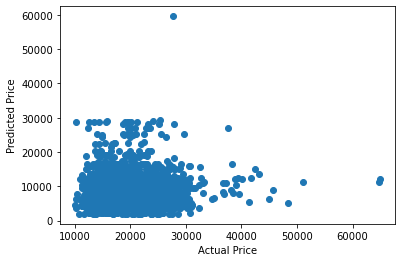

In [146]:
plt.scatter(df3,df2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [147]:
md=[lm,knn,dt,gbdt]
import pickle
filename="Flight Prediction"
pickle.dump(md,open(filename,"wb"))

# Conclusion:
1. Conducted 4 models on Flight Prediction dataset namely, Linear Regression, KNN , Decision Tree and GBDT
2. It comes to a conclusion that Decision Tree model is providing best score for Flight_Prediction dataset
3. r2_score=  0.7835614709216479
4. Prediction is Done On Test Dataset using Decision Tree Model